In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import pickle
warnings.filterwarnings(action='ignore') 

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [3]:
df=pd.read_csv('./최종_전세사기_all_.csv')
df.head()

,Unnamed: 0,title,내용,내용1(응답),description,태그,날짜,조회수,link
0,0,서울 갭투자,재개발 말이나오는 지역에 갭투자를 했는데요 재작년 말쯤이었고 원래는 세대원으로 살다...,재개발의 경우는 서울 투자한 곳에 실거주하지 않아도 조합원 자격이 ...,재개발 말이나오는 지역에 <b>갭투자</b>를 했는데요 재작년 말쯤이었고 원래는 세...,"분양, 청약",2022.10.05,48.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
1,1,부동산 경매 갭투자,부동산 경매와 갭투자는 어떤구조로 되어있는지 각각 알려주세요 수익금은 둘중 뭐가더 ...,"안녕하세요, 질문자님​부동산경매와 갭투자에 대해 질문을 주셨네요!​...",부동산 경매와 <b>갭투자</b>는 어떤구조로 되어있는지 각각 알려주세요 수익금은....,경매,2022.09.04,370.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
2,2,갭투자에 관한 질문이에요.,NaN,질문에 답변드리겠습니다. 갭투자를 한 후 현 임차인이 퇴거를 하는 ...,<b>갭투자</b>에 관한 질문이에요. 집값이 떨어질 때 제가 집을 매매하려고 하잖...,매매,2022.09.13,90.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
3,3,김포 빌라 갭투자,제가 김포쪽으로 신축빌라를 하나 사서 제 지인에게 전세를 놓고 싶은데 전세가 안되는...,네전세는 다 놓을수있어요근데 요즘 집값이 떨어지는 추세라 전셋값도 ...,... 아무 집이든 <b>갭투자</b>가 가능한건가요? 안녕하세요... 집과사람들...,매매,2022.10.02,62.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
4,4,개인회생 개시결정후 갭투자,개인회생 개시가 나서 월변제금을 납부하고있고 아직 인가결정은 안났습니다.그런데 아버...,개인회생 개시가 나서 월변제금을 납부하고있고 아직 인가결정은 안났습...,... 그런데 아버지가 부동산업을 하시는데 부동산을 <b>갭투자</b>를 전세 1억...,"신용, 파산",2022.06.05,216.0,https://kin.naver.com/qna/detail.naver?d1id=6&...


### TF 읽어오기

In [5]:
with open('./contents_tf_df.pickle', 'rb') as f:
    tf_df = pickle.load(f)

In [6]:
tf_df

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### IDF 읽어오기

In [7]:
with open('./contents_idf.pickle', 'rb') as f:
    idf = pickle.load(f)
idf

가      2.449478
가가     3.051538
가개     3.051538
가게     2.122119
가격     1.252198
         ...   
히틀러    3.051538
힌      3.051538
힐      2.750508
힐링     2.750508
힘      2.097296
Length: 10289, dtype: float64

### TFIDF 읽어오기

In [8]:
with open('./contents_tfidf_df.pickle', 'rb') as f:
    tfidf = pickle.load(f)
tfidf

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.097296
2248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## 네트워크차트(1) -전체단어 tfidf

In [10]:
tfidf_corr=tfidf.corr()
tfidf

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.097296
2248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [11]:
### 단어의 집합별 상관계수 값 리스트화 하기
words=tfidf_corr.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], tfidf_corr.iloc[i,j]))
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)

###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능

##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]



ModuleNotFoundError: No module named 'networkx'

In [12]:
edge_list

[('교황', '로마'),
 ('깃', '로마'),
 ('다섯', '로마'),
 ('동북', '로마'),
 ('딤', '로마'),
 ('로마', '박해'),
 ('로마', '신명기'),
 ('로마', '안디'),
 ('로마', '약탈'),
 ('로마', '에피'),
 ('로마', '오크스'),
 ('로마', '진리'),
 ('로마', '칼날'),
 ('로마', '케사르'),
 ('로마', '파네스'),
 ('고레스', '동로'),
 ('고레스', '표범'),
 ('동로', '무저갱'),
 ('동로', '사라센'),
 ('동로', '선지자'),
 ('동로', '성읍'),
 ('동로', '초림'),
 ('무저갱', '표범'),
 ('사라센', '표범'),
 ('선지자', '표범'),
 ('성읍', '표범'),
 ('초림', '표범'),
 ('강변', '런던'),
 ('격차', '런던'),
 ('고층', '런던'),
 ('글로벌', '런던'),
 ('다국적', '런던'),
 ('런던', '로열'),
 ('런던', '미션'),
 ('런던', '부지기수'),
 ('런던', '부촌'),
 ('런던', '비뉴'),
 ('런던', '비숍'),
 ('런던', '빈부'),
 ('런던', '사우디아라비아'),
 ('런던', '설움'),
 ('런던', '스테드'),
 ('런던', '식량'),
 ('런던', '신성'),
 ('런던', '신식'),
 ('런던', '쓰레기장'),
 ('런던', '요지경'),
 ('런던', '익명'),
 ('런던', '임파서블'),
 ('런던', '중산'),
 ('런던', '지구촌'),
 ('런던', '지니'),
 ('런던', '천억'),
 ('런던', '큰손'),
 ('런던', '템즈'),
 ('런던', '패밀리'),
 ('런던', '폐'),
 ('런던', '하이게이트'),
 ('런던', '햄'),
 ('런던', '호가'),
 ('가닥', '육군'),
 ('가닥', '인민군'),
 ('감행', '육군'),
 ('감행', '인민군'),
 ('강다리', '

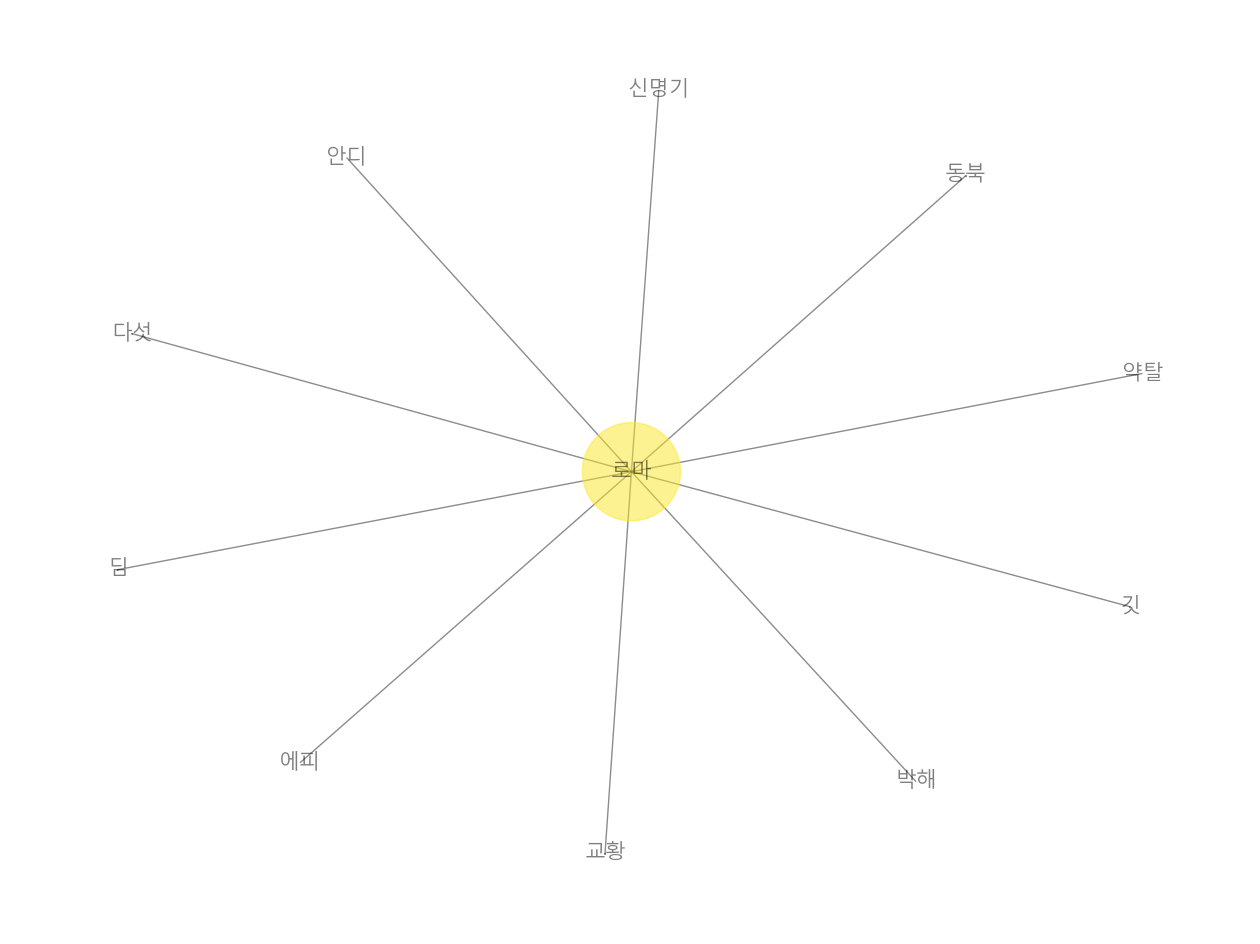

In [14]:
import networkx as nx

G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))

pr=nx.pagerank(G)

#노드 사이즈(단어빈도수)
nsize=np.array([v for v in pr.values()])
nsize=5000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화

plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.savefig('./내용분석/네트워크차트_전체단어_tfidf.png')
plt.show()

##  상관계수 네트워크 차트(2) 상위노출 100단어 tfidf100_corr

In [50]:
vocab100=tfidf.sum().sort_values(ascending=False)[:100].index

In [51]:
tfidf100=tfidf[vocab100]
tfidf100

,회생,개인,파산,집,신청,계약,주인,대출,면책,전세,...,작성,깡통,할머니,반환,건가요,인회,입금,신축,소유,비용
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.851509,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.289986,0.0,0.000000,0.0,0.000000,0.0,0.367553,...,0.00000,0.0,0.0,0.0,0.851509,0.0,0.0,2.048378,0.000000,0.0
4,1.729319,1.032422,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.183776,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0.000000,0.000000,0.0,0.579973,0.0,0.292626,0.0,3.180743,0.0,0.918882,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.014112,0.0
2248,0.000000,0.000000,0.0,0.000000,0.0,0.292626,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2249,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.183776,...,0.00000,0.0,0.0,0.0,0.851509,0.0,0.0,0.000000,0.000000,0.0
2250,0.000000,0.000000,0.0,0.000000,0.0,2.048385,0.0,0.000000,0.0,0.183776,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [53]:
tfidf100_corr=tfidf100.corr()
tfidf100_corr

,회생,개인,파산,집,신청,계약,주인,대출,면책,전세,...,작성,깡통,할머니,반환,건가요,인회,입금,신축,소유,비용
회생,1.000000,0.999417,0.998411,0.109964,0.993452,-0.022086,-0.022407,0.029589,0.991339,-0.004936,...,0.163487,-0.018232,-0.003381,-0.003760,0.157708,0.981583,0.296626,-0.015468,0.124776,0.913863
개인,0.999417,1.000000,0.999072,0.111777,0.993605,-0.019738,-0.021224,0.039231,0.991875,-0.001953,...,0.164652,-0.018733,-0.003576,-0.002506,0.158838,0.983292,0.298165,-0.014510,0.125245,0.912112
파산,0.998411,0.999072,1.000000,0.112528,0.992596,-0.021419,-0.021504,0.018108,0.993011,-0.005513,...,0.160215,-0.018520,-0.003335,-0.002474,0.159175,0.985759,0.292782,-0.015094,0.124271,0.903627
집,0.109964,0.111777,0.112528,1.000000,0.121969,0.287191,0.758785,0.015120,0.113246,0.284126,...,0.167263,0.013567,0.154688,0.151100,0.161297,0.114320,0.062547,0.018438,0.074077,0.115621
신청,0.993452,0.993605,0.992596,0.121969,1.000000,-0.010173,-0.012859,0.072410,0.989833,0.006452,...,0.188217,-0.015955,-0.004295,0.006825,0.158386,0.972534,0.298394,-0.013250,0.129871,0.914586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
인회,0.981583,0.983292,0.985759,0.114320,0.972534,-0.020023,-0.021054,0.019205,0.964957,-0.005388,...,0.137455,-0.018161,-0.003234,-0.002325,0.144062,1.000000,0.280521,-0.014795,0.129836,0.855657
입금,0.296626,0.298165,0.292782,0.062547,0.298394,0.182624,-0.006772,0.043927,0.290784,0.070292,...,0.187344,-0.030277,-0.011603,0.087784,0.064619,0.280521,1.000000,0.016210,0.090510,0.316072
신축,-0.015468,-0.014510,-0.015094,0.018438,-0.013250,0.088101,0.014620,0.017633,-0.015138,0.155518,...,0.044953,0.076963,-0.015930,0.113352,0.039251,-0.014795,0.016210,1.000000,0.080683,-0.005941
소유,0.124776,0.125245,0.124271,0.074077,0.129871,0.228748,0.116347,0.010367,0.116034,0.144629,...,0.129073,-0.026805,-0.016172,0.181282,0.025579,0.129836,0.090510,0.080683,1.000000,0.153693


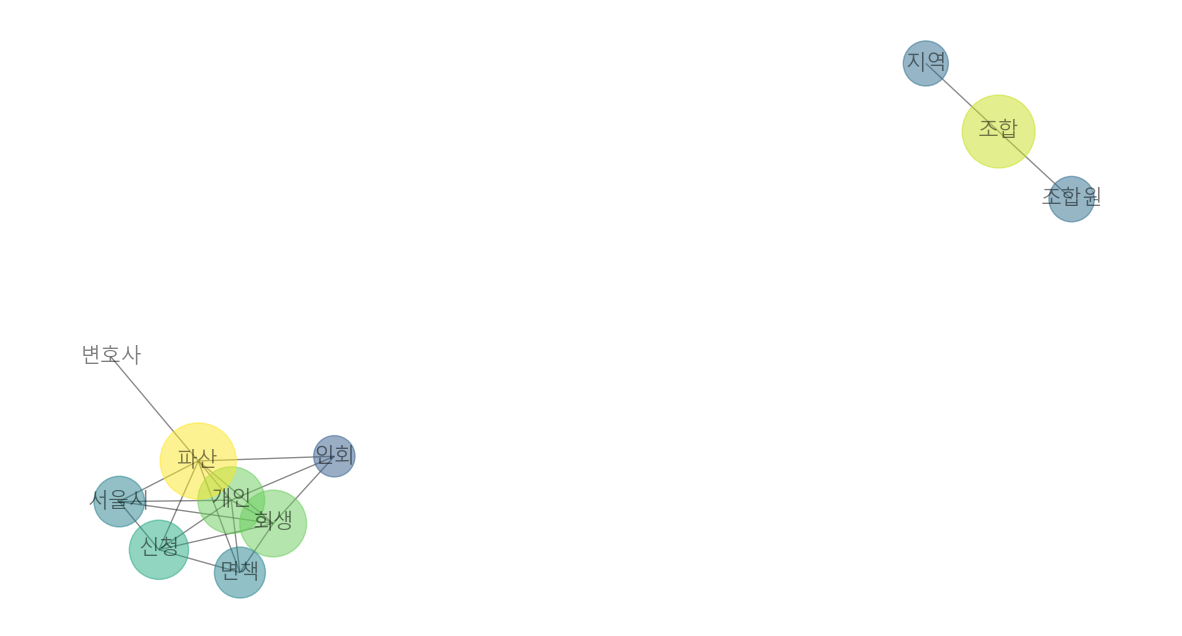

In [77]:
### 단어의 집합별 상관계수 값 리스트화 하기
words=tfidf100_corr.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], tfidf50_corr.iloc[i,j]))
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)

###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능

##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]

import networkx as nx

G = nx.Graph()
rank=20

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))

pr=nx.pagerank(G)

#노드 사이즈(단어빈도수)
nsize=np.array([v for v in pr.values()])
nsize=3000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화

plt.figure(figsize=(15,8)); plt.axis('off')
fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.savefig('./내용분석/네트워크차트_fre100_tfidf.png')
plt.show()

##  상관계수 네트워크 차트(3) 상위노출 100단어 tf100_corr

In [67]:
vocab100_tf=tf_df.sum().sort_values(ascending=False)[:100].index

In [68]:
vocab100_tf

Index(['전세', '개인', '집', '계약', '회생', '주인', '파산', '대출', '부동산', '사기', '매매', '계약서',
       '보험', '보증금', '보증', '신청', '임대인', '가능', '저', '때', '말', '경우', '확인', '신고',
       '상태', '건물', '상황', '진행', '돈', '사람', '은행', '주택', '연락', '세입자', '전세금', '정도',
       '경매', '계약금', '이사', '분', '문제', '방법', '근저당', '저희', '가입', '빌라', '생각',
       '중개사', '압류', '일자', '임차인', '등기부', '월세', '금액', '확정', '전입', '곳', '내용',
       '잔금', '천만', '건가요', '전화', '깡통', '부탁', '날', '기간', '공인', '분양', '데', '면책',
       '반환', '입주', '등기', '법', '작성', '오피스텔', '이', '소송', '답변', '달', '조건', '안녕',
       '소유', '때문', '신축', '변호사', '매물', '아파트', '명의', '임대차', '개월', '신용', '지역',
       '신탁', '부분', '투자', '입금', '건', '조합', '당시'],
      dtype='object')

In [70]:
tf100=tf_df[vocab100_tf]
tf100

,전세,개인,집,계약,회생,주인,파산,대출,부동산,사기,...,개월,신용,지역,신탁,부분,투자,입금,건,조합,당시
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,4,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,5,0,2,1,0,0,0,7,0,0,...,0,1,0,0,0,0,0,1,0,0
2248,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2249,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2250,1,0,0,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [71]:
tf100_corr=tf100.corr()
tf100_corr

,전세,개인,집,계약,회생,주인,파산,대출,부동산,사기,...,개월,신용,지역,신탁,부분,투자,입금,건,조합,당시
전세,1.000000,-0.001953,0.284126,0.313189,-0.004936,0.243863,-0.005513,0.158723,0.226255,0.324033,...,0.084657,0.085346,-0.012206,-0.022157,0.140847,0.014009,0.070292,0.068114,-0.021645,0.144140
개인,-0.001953,1.000000,0.111777,-0.019738,0.999417,-0.021224,0.999072,0.039231,0.076456,0.040947,...,0.324379,0.674352,0.040467,0.009742,0.253515,0.302059,0.298165,0.053380,0.001114,0.003175
집,0.284126,0.111777,1.000000,0.287191,0.109964,0.758785,0.112528,0.015120,0.279478,0.119335,...,0.108459,0.070832,0.116052,-0.037890,0.085127,0.008285,0.062547,0.175371,0.112967,0.183915
계약,0.313189,-0.019738,0.287191,1.000000,-0.022086,0.298555,-0.021419,0.003746,0.410090,0.145407,...,0.066647,-0.024817,0.141591,0.152221,0.223386,-0.032228,0.182624,0.168778,0.147792,0.408463
회생,-0.004936,0.999417,0.109964,-0.022086,1.000000,-0.022407,0.998411,0.029589,0.072377,0.038684,...,0.317934,0.670890,0.038063,0.008699,0.249872,0.301294,0.296626,0.052781,-0.001426,0.001082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
투자,0.014009,0.302059,0.008285,-0.032228,0.301294,-0.062344,0.305657,0.033336,0.047495,-0.037288,...,0.096306,0.213483,0.036275,0.029241,0.131138,1.000000,0.077267,0.042125,-0.000439,-0.016951
입금,0.070292,0.298165,0.062547,0.182624,0.296626,-0.006772,0.292782,0.043927,0.273729,0.033168,...,0.128522,0.221835,0.034269,0.077520,0.188038,0.077267,1.000000,0.029922,0.026745,0.027327
건,0.068114,0.053380,0.175371,0.168778,0.052781,0.105693,0.054424,0.061929,0.123320,0.057664,...,0.120225,0.067984,0.103555,0.020256,0.088932,0.042125,0.029922,1.000000,0.094337,0.059562
조합,-0.021645,0.001114,0.112967,0.147792,-0.001426,-0.003206,-0.001261,0.029238,0.071694,0.403256,...,0.089172,0.020578,0.985109,0.023759,0.075270,-0.000439,0.026745,0.094337,1.000000,0.115382


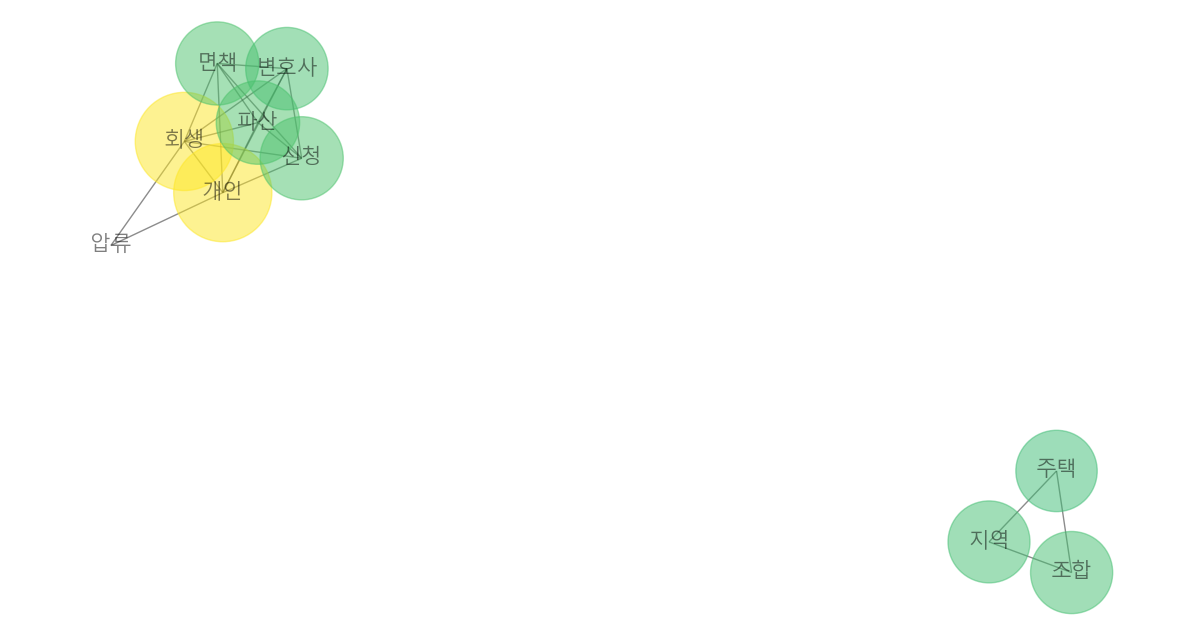

In [85]:
### 단어의 집합별 상관계수 값 리스트화 하기
words=tf100_corr.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], tf100_corr.iloc[i,j]))
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)

###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능

##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]

import networkx as nx

G = nx.Graph()
rank=20

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))

pr=nx.pagerank(G)

#노드 사이즈
nsize=np.array([v for v in pr.values()])
nsize=5000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화

plt.figure(figsize=(15,8)); plt.axis('off')
fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.savefig('./내용분석/네트워크차트_fre100_tf.png')
plt.show()